In [ ]:
#Importo la librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import openpyxl

# Carga y exploración inicial de datos

In [ ]:
# Cargo los datos de un archivo de excel
df= pd.read_excel("Senado_Col.xlsx", sheet_name="dis_senado")
print(type(df))
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               103 non-null    int64  
 1   nombre           103 non-null    object 
 2   partido          103 non-null    object 
 3   bancada          103 non-null    object 
 4   Duro             94 non-null     object 
 5   comision         103 non-null    object 
 6   ultima_votacion  103 non-null    float64
 7   perfil           102 non-null    object 
 8   entidades        9 non-null      object 
 9   departamento     87 non-null     object 
 10  debilidades      61 non-null     object 
 11  apoyo_rechazo    0 non-null      float64
 12  proyecto_ley     0 non-null      float64
 13  voto             0 non-null      float64
dtypes: float64(4), int64(1), object(9)
memory usage: 11.4+ KB


,id,nombre,partido,bancada,Duro,comision,ultima_votacion,perfil,entidades,departamento,debilidades,apoyo_rechazo,proyecto_ley,voto
0,1,Lidio García Turbay,Partido Liberal,Gobierno,flexible,Quinta,175000.0,1. Artista vallenato y político conocido como ...,Vivienda y agua,Bolivar,1. Familiar de los José Félix Turbay (condena...,NaN,NaN,NaN
1,2,Juan Pablo Gallo Maya,Partido Liberal,Oposición,duro,Tercera,134000.0,1. Fue electo alcalde de pereira con 126 mil v...,NaN,Pereira,1. Fue suspendido tres meses antes de terminar...,NaN,NaN,NaN
2,3,Karina Espinosa Oliver,Partido Liberal,Oposición,flexible,Tercera,121000.0,"1. Abogada, especialista en tributario, mágist...",NaN,Sucre,NaN,NaN,NaN,NaN
3,4,Alejandro Carlos Chacón,Partido Liberal,Oposición,flexible,Primera,117000.0,"1.Abogado, especialista en admnistrativo.\n\n2...",NaN,Cucuta,1. Fue respaldado en su campaña a cámara en 2...,NaN,NaN,NaN
4,5,Fabio Raúl Amin Saleme,Partido Liberal,Gobierno,duro,primera,117000.0,"1.Economist y políticoa, muy influyente en su ...","1. Unidad de Servicios Penitenciarios, Uspec.\...",Córdoba,"1, Para las elecciones de 2004 se presentó a l...",NaN,NaN,NaN


# Limpieza de datos

In [ ]:
#En primer lugar, elimino las columnas que posean más de 45 registros nulos.
df2= df.dropna(axis=1, thresh=len(df)-45)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               103 non-null    int64  
 1   nombre           103 non-null    object 
 2   partido          103 non-null    object 
 3   bancada          103 non-null    object 
 4   Duro             94 non-null     object 
 5   comision         103 non-null    object 
 6   ultima_votacion  103 non-null    float64
 7   perfil           102 non-null    object 
 8   departamento     87 non-null     object 
 9   debilidades      61 non-null     object 
dtypes: float64(1), int64(1), object(8)
memory usage: 8.2+ KB


In [ ]:
#Completamos registros vacios con la categoría desconocido
df2 = df2.fillna("Desconocido")
df2.info()
df2["comision"].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               103 non-null    int64  
 1   nombre           103 non-null    object 
 2   partido          103 non-null    object 
 3   bancada          103 non-null    object 
 4   Duro             103 non-null    object 
 5   comision         103 non-null    object 
 6   ultima_votacion  103 non-null    float64
 7   perfil           103 non-null    object 
 8   departamento     103 non-null    object 
 9   debilidades      103 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 8.2+ KB


array(['Quinta', 'Tercera', 'Primera', 'primera', 'séptima', 'cuarta',
       'Séptima', 'tercera', 'Segunda', 'Sexta', 'quinta', 'segunda',
       'sexta', 'Cuarta', 'Segunda ', 'Quinta ', 'Séptima '], dtype=object)

In [ ]:
#Cambio a tipo str todas las columbas de tipo object
df2[df2.select_dtypes(include='object').columns] = df2.select_dtypes(include='object').astype(str)
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               103 non-null    int64  
 1   nombre           103 non-null    object 
 2   partido          103 non-null    object 
 3   bancada          103 non-null    object 
 4   Duro             103 non-null    object 
 5   comision         103 non-null    object 
 6   ultima_votacion  103 non-null    float64
 7   perfil           103 non-null    object 
 8   departamento     103 non-null    object 
 9   debilidades      103 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 8.2+ KB


**Limpio encabezados**

In [ ]:
#Convierto a títulos con incial mayúscula todos los nombres de las columnnas
df2.columns = df2.columns.str.title()
df2.columns

Index(['Id', 'Nombre', 'Partido', 'Bancada', 'Duro', 'Comision',
       'Ultima_Votacion', 'Perfil', 'Departamento', 'Debilidades'],
      dtype='object')

In [ ]:
#Convertimos a incial mayuscula todas las categorias
df2["Partido"] = df2["Partido"].str.strip().str.title()
df2["Bancada"] = df2["Bancada"].str.strip().str.title()
df2["Departamento"] = df2["Departamento"].str.strip().str.title()
df2["Comision"] = df2["Comision"].str.strip().str.title()
df2["Duro"] = df2["Duro"].str.strip().str.title()



In [ ]:
#En primer lugar, realizo una iteracion para convertir columnas tipo "object" en "categóricas"
excluir = ['Nombre', 'Perfil', 'Debilidades']
cualitativas = df2.select_dtypes(include='object').drop(columns=excluir)
for col in cualitativas.columns:
    df2[col] = pd.Categorical(df2[col])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Id               103 non-null    int64   
 1   Nombre           103 non-null    object  
 2   Partido          103 non-null    category
 3   Bancada          103 non-null    category
 4   Duro             103 non-null    category
 5   Comision         103 non-null    category
 6   Ultima_Votacion  103 non-null    float64 
 7   Perfil           103 non-null    object  
 8   Departamento     103 non-null    category
 9   Debilidades      103 non-null    object  
dtypes: category(5), float64(1), int64(1), object(3)
memory usage: 7.0+ KB


In [ ]:
#Visualizamos todas las categorías de cada columna (variables categóricas) para proceder a estandarizar
for col in df2.select_dtypes(include='category').columns:
    print(f"Columna: {col}")
    print(df2[col].cat.categories)

Columna: Partido
Index(['Alianza Cristiana', 'Cambio Radical', 'Centro Democrático',
       'Coalición Centro Esperanza', 'Comunes', 'Curules Indígenas', 'De La U',
       'Pacto Histórico', 'Partido Conservador', 'Partido Liberal'],
      dtype='object')
Columna: Bancada
Index(['Gobierno', 'Independiente', 'Oposición'], dtype='object')
Columna: Duro
Index(['Blando', 'Desconocido', 'Dura', 'Duro', 'Flexible'], dtype='object')
Columna: Comision
Index(['Cuarta', 'Primera', 'Quinta', 'Segunda', 'Sexta', 'Séptima',
       'Tercera'],
      dtype='object')
Columna: Departamento
Index(['Antioquia', 'Antioquia, Suroeste', 'Atlantico', 'Atlantico Y  Bogotá',
       'Atlántico', 'Bogotá', 'Bolivar', 'Bolívar', 'Boyacá', 'Bucaramanga',
       'Caldas', 'Cauca', 'Cesar', 'Cordoba', 'Costa Caribe En General',
       'Cucuta', 'Cundinamarca', 'Córdoba', 'Desconocido', 'Exterior',
       'Guajira', 'Huila', 'Magdalena', 'Meta', 'Nariño', 'Norte De Santander',
       'Pereira', 'Risaralda', 'Santande

In [ ]:
# Las columnas "partido", "bancada" y comisión ya se encuentran estandarizadas. Procedo a estandarizar las demás categorías.
# Inicio con la columna "departamento"
df2["Departamento"] = df2["Departamento"].replace({"Antioquia, Suroeste": "Antioquia",
                            "Atlantico Y  Bogotá": "Atlántico", "Atlantico": "Atlántico",
                             'Costa Caribe En General': "Costa Caribe",
                             "Bolívar": "Bolivar",
                             'Santander Y Casanare': "Casanare",
                              "Pereira":"Risaralda"})
print(df2["Departamento"].cat.categories)

Index(['Antioquia', 'Atlántico', 'Bogotá', 'Bolivar', 'Boyacá', 'Bucaramanga',
       'Caldas', 'Cauca', 'Cesar', 'Cordoba', 'Costa Caribe', 'Cucuta',
       'Cundinamarca', 'Córdoba', 'Desconocido', 'Exterior', 'Guajira',
       'Huila', 'Magdalena', 'Meta', 'Nariño', 'Norte De Santander',
       'Risaralda', 'Santander', 'Casanare', 'Sucre', 'Tolima',
       'Valle Del Cauca'],
      dtype='object')


<ipython-input-10-b0f8bbb2b2f2>:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df2["Departamento"] = df2["Departamento"].replace({"Antioquia, Suroeste": "Antioquia",


In [ ]:
#Continuo con la columna "duro"
df2["Duro"] = df2["Duro"].replace({"Blando" : "Flexible","Flexible " :"Flexible",
                                                 "Dura": "Fuerte", "Duro":"Fuerte"})
print(df2["Duro"].cat.categories)

Index(['Desconocido', 'Fuerte', 'Flexible'], dtype='object')


<ipython-input-11-54dff31136f2>:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df2["Duro"] = df2["Duro"].replace({"Blando" : "Flexible","Flexible " :"Flexible",


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Id               103 non-null    int64   
 1   Nombre           103 non-null    object  
 2   Partido          103 non-null    category
 3   Bancada          103 non-null    category
 4   Duro             103 non-null    category
 5   Comision         103 non-null    category
 6   Ultima_Votacion  103 non-null    float64 
 7   Perfil           103 non-null    object  
 8   Departamento     103 non-null    category
 9   Debilidades      103 non-null    object  
dtypes: category(5), float64(1), int64(1), object(3)
memory usage: 6.9+ KB


### **Limpieza variables cuantitativas**


In [ ]:
 #Creo una función para convertir columnas "Id" y "Ultima_Votacion" de float a int
 def conversion_data_type_int(df):
    df['Ultima_Votacion'] = df['Ultima_Votacion'].replace(',', '.', regex=True).astype(float).astype(int)
    df['Id'] = df['Id'].replace(',', '.', regex=True).astype(int)
    return df


In [ ]:
# Llamo la función y la paso como argumrnto el df2
df2 = conversion_data_type_int(df2)

In [ ]:
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Id               103 non-null    int64   
 1   Nombre           103 non-null    object  
 2   Partido          103 non-null    category
 3   Bancada          103 non-null    category
 4   Duro             103 non-null    category
 5   Comision         103 non-null    category
 6   Ultima_Votacion  103 non-null    float64 
 7   Perfil           103 non-null    object  
 8   Departamento     103 non-null    category
 9   Debilidades      103 non-null    object  
dtypes: category(5), float64(1), int64(1), object(3)
memory usage: 6.9+ KB


,Id,Nombre,Partido,Bancada,Duro,Comision,Ultima_Votacion,Perfil,Departamento,Debilidades
0,1,Lidio García Turbay,Partido Liberal,Gobierno,Flexible,Quinta,175000.0,1. Artista vallenato y político conocido como ...,Bolivar,1. Familiar de los José Félix Turbay (condena...
1,2,Juan Pablo Gallo Maya,Partido Liberal,Oposición,Fuerte,Tercera,134000.0,1. Fue electo alcalde de pereira con 126 mil v...,Risaralda,1. Fue suspendido tres meses antes de terminar...
2,3,Karina Espinosa Oliver,Partido Liberal,Oposición,Flexible,Tercera,121000.0,"1. Abogada, especialista en tributario, mágist...",Sucre,Desconocido
3,4,Alejandro Carlos Chacón,Partido Liberal,Oposición,Flexible,Primera,117000.0,"1.Abogado, especialista en admnistrativo.\n\n2...",Cucuta,1. Fue respaldado en su campaña a cámara en 2...
4,5,Fabio Raúl Amin Saleme,Partido Liberal,Gobierno,Fuerte,Primera,117000.0,"1.Economist y políticoa, muy influyente en su ...",Córdoba,"1, Para las elecciones de 2004 se presentó a l..."


# **Resumen estadístico**

In [ ]:
#Variables cuantitativas
des_cuanti = df2.describe(include='int')
des_cuanti

,Id
count,103.000000
mean,53.524272
std,30.836331
min,1.000000
25%,27.500000
50%,53.000000
75%,80.500000
max,106.000000


In [ ]:
#Variables cualitativas
des_cuali = df2.describe(include='category')
des_cuali

,Partido,Bancada,Duro,Comision,Departamento
count,103,103,103,103,103
unique,10,3,3,7,28
top,Pacto Histórico,Oposición,Fuerte,Primera,Desconocido
freq,17,45,66,23,16


In [ ]:
#Finalmente exporto el df2 con el proceso de limpieza concluido y así poder utilizarlo en otras fases del proyecto.
df2.to_excel("Senado_Col_limpio.xlsx", sheet_name="dis_senado", index=False)


## **Visualizaciones exploratorias**

**Variables cuantitativas**

Empiezo por graficar la única variable cuantitativa de mi interés: "Ultima_Votacion"

Text(0, 0.5, 'Votos')

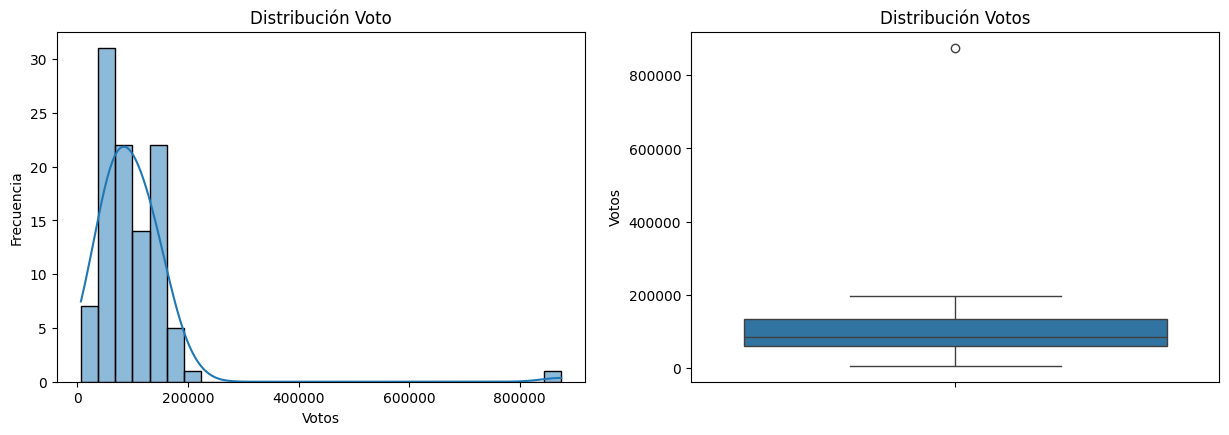

In [ ]:
#Frecuencias Ultima_Votacion
#Al tratarse de una variable cuantitativa continua, el hisograma resulta adecuado para visualizar frecuencias.
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(df2['Ultima_Votacion'], kde=True)
plt.title('Distribución Voto')
plt.xlabel('Votos')
plt.ylabel('Frecuencia')

plt.subplot(2, 2, 2)
sns.boxplot(data=df2, y='Ultima_Votacion')
plt.title('Distribución Votos')
plt.ylabel('Votos')

**Variables cualitativas**

**"Partido"**

Ahora me detendré un momento a graficar cada una de las variables categóricas de mi interés, iniciamos por la variable "Partido". Pero antes será necesario obtener las frecuencias de cada categoría.

In [ ]:
#Frecuencias Partido
#Al tratarse de una variable categórica, el gráfico de barras puede representarlo muy bien.

# Primero se debe crear la tabla de frecuencias
frecuencias_partido = df2['Partido'].value_counts().reset_index()
frecuencias_partido.columns = ['Partido', 'Frecuencia']
frecuencias_partido


,Partido,Frecuencia
0,Pacto Histórico,17
1,Partido Conservador,16
2,Coalición Centro Esperanza,13
3,Partido Liberal,13
4,Centro Democrático,12
5,Cambio Radical,11
6,De La U,10
7,Comunes,5
8,Alianza Cristiana,4
9,Curules Indígenas,2


Si bien esta visualización es simplemente exploratoria y no tiene el propósito de ser publicada, aún en este punto resulta importante porder diferenciar fácilmete a cada partido por medio del color que le identifica.

In [ ]:
# Asigno un color para cada partido
color_partido = {
    "Pacto Histórico" : "#C63CD6",
    "Partido Conservador" : "#001170",
    "Coalición Centro Esperanza" : "#509922",
    "Partido Liberal" : "#DB0F00",
    "Centro Democrático" : "#5080B2",
    "Cambio Radical" : "#FA1B68",
    "De La U" : "#F57E00",
    "Comunes" : "#F43A36",
    "Alianza Cristiana" : "#1A82F5",
    "Curules Indígenas" : "#B9E59E"
}


<ipython-input-22-b4aacbbfcfba>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Partido', y='Frecuencia', data=frecuencias_partido,


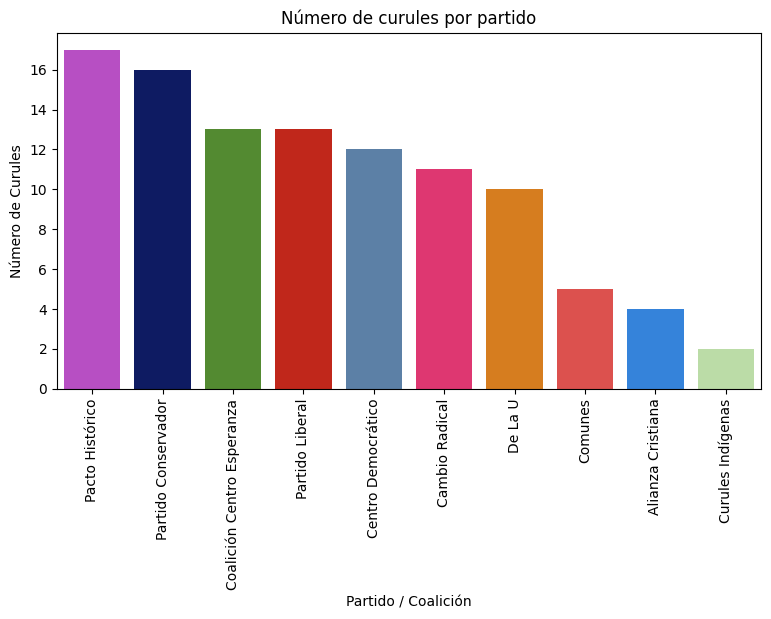

In [ ]:
# Ordeno los partidos por frecuencia en orden descendente
frecuencias_partido = frecuencias_partido.sort_values(by='Frecuencia', ascending=False)

# Convierto la columna 'Partido' a una categoría ordenada
frecuencias_partido['Partido'] = pd.Categorical(
    frecuencias_partido['Partido'],
    categories=frecuencias_partido['Partido'],
    ordered=True
)

plt.figure(figsize=(15, 10))

# Creo el gráfico de barras con las frecuencias ordenadas
plt.subplot(2, 2, 1)
sns.barplot(x='Partido', y='Frecuencia', data=frecuencias_partido,
            order=frecuencias_partido["Partido"],
            palette=color_partido)
plt.title('Número de curules por partido')
plt.xlabel('Partido / Coalición')
plt.ylabel('Número de Curules')
plt.xticks(rotation=90)  # Roto las etiquetas del eje X

plt.tight_layout()
plt.show()

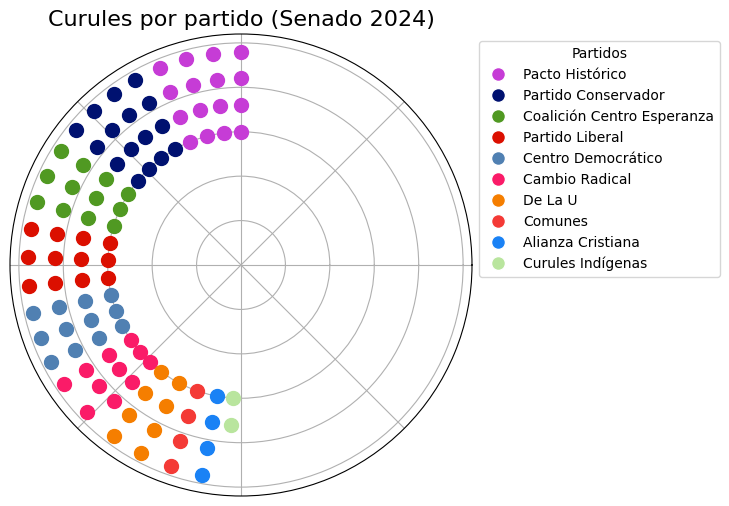

In [ ]:
#Creo un grafico de hemiciclo para representar mejor la distribuciónparlamentaria
#Obtengo las variables de mi interés
partidos = frecuencias_partido["Partido"]
escanos = frecuencias_partido["Frecuencia"]
colores_dict = {
    "Pacto Histórico" : "#C63CD6",
    "Partido Conservador" : "#001170",
    "Coalición Centro Esperanza" : "#509922",
    "Partido Liberal" : "#DB0F00",
    "Centro Democrático" : "#5080B2",
    "Cambio Radical" : "#FA1B68",
    "De La U" : "#F57E00",
    "Comunes" : "#F43A36",
    "Alianza Cristiana" : "#1A82F5",
    "Curules Indígenas" : "#B9E59E"
}

# En primer lugar debo obtener el total de las curules o escaños
total_escanos = sum(escanos)

# Después defino el número de filas para los escaños
num_filas = 5

# Creo la figura
plt.figure(figsize=(10, 6))

# Creo un ángulo inicial para cada partido y escaños
start_angle = 90  # Ángulo inicial

# Creo listas vacías para las leyendas
handles = []
labels = []

# Disponibilizo la información necesaria para cada partido
for idx, partido in enumerate(partidos):
    num_escanos = escanos[idx]  # Número de curules para este partido
    color = colores_dict[partido]  # Color del partido

    # Calculo el ángulo que ocupa este partido
    angle_span = (num_escanos / total_escanos) * 180  # Proporción del ángulo semicírculo

    # Creo los ángulos para los escaños de este partido
    angles = np.linspace(start_angle, start_angle + angle_span, num_escanos, endpoint=False)

    # Distribuyo los escaños en las filas concéntricas
    escanos_por_fila = np.ceil(num_escanos / num_filas).astype(int)  # Número de escaños por fila para este partido
    for fila in range(num_filas):
        radio = 1.5 + fila * 0.3  # Aumenta el radio para cada fila

        # Calculo cuántos escaños quedan en esta fila (para no exceder el número de escaños restantes)
        escaños_en_fila = min(escanos_por_fila, num_escanos - fila * escanos_por_fila)

        if escaños_en_fila <= 0:
            break  # No asignar más escaños si ya no quedan

        # Creao ángulos para la fila actual, distribuidos proporcionalmente
        fila_angles = np.linspace(start_angle, start_angle + angle_span, escaños_en_fila, endpoint=False)

        # Dibujo los escaños en un arco
        for angle in fila_angles:
            plt.polar(np.deg2rad(angle), radio, marker='o', markersize=10, color=color)  # Uso el diccionario para obtener el color

    # Aumento el ángulo inicial para el siguiente partido
    start_angle += angle_span

    # Añado el handle (representación del partido) y el label (nombre del partido) para la leyenda
    handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10))
    labels.append(partido)

# Agrego la leyenda
plt.legend(handles=handles, labels=labels, loc='upper left', bbox_to_anchor=(1, 1), title="Partidos")

# Configuraciones adicionales
plt.title('Curules por partido (Senado 2024)', fontsize=16)
plt.gca().set_yticklabels([])  # Oculto etiquetas del radio
plt.gca().set_xticklabels([])  # Oculto etiquetas del ángulo
plt.gca().set_ylim(0, radio + 0.5)  # Ajusto límites del radio

# Muestro gráfico
plt.show()

**Bancada**

In [ ]:
#Frecuencias Bancada
#También estamos ante una variable categórica. De ahí que primero creamos la tabla de frecuencias absolutas.
frecuencias_bancada = df2['Bancada'].value_counts().reset_index()
frecuencias_bancada.columns = ['Bancada', 'Frecuencia']
frecuencias_bancada.info()
frecuencias_bancada


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Bancada     3 non-null      category
 1   Frecuencia  3 non-null      int64   
dtypes: category(1), int64(1)
memory usage: 287.0 bytes


,Bancada,Frecuencia
0,Oposición,45
1,Gobierno,38
2,Independiente,20


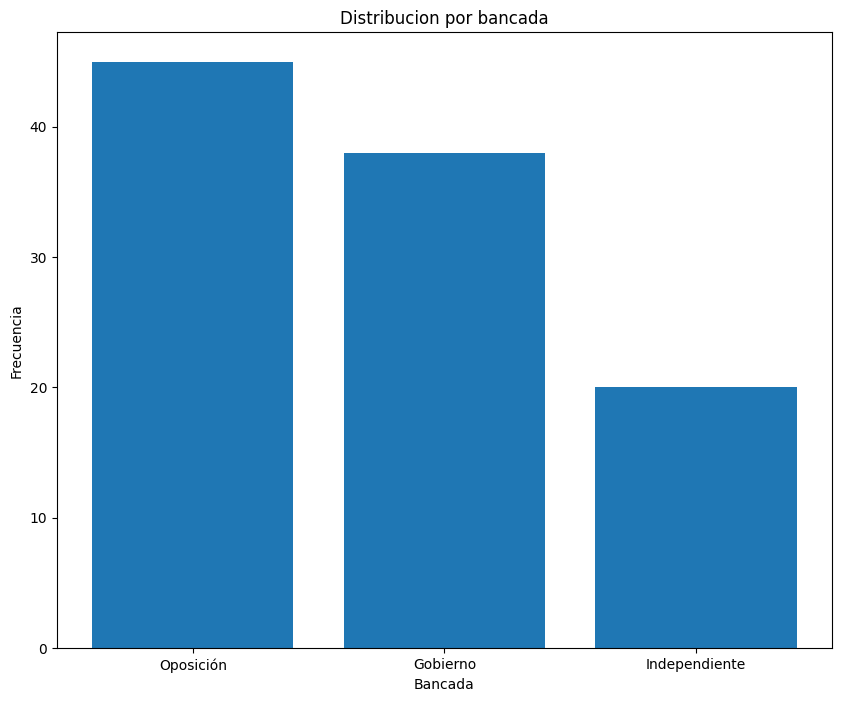

In [ ]:
# Gráfico Bancada

plt.figure(figsize=(10, 8))
plt.bar(frecuencias_bancada['Bancada'], frecuencias_bancada['Frecuencia'])
plt.xlabel('Bancada')
plt.ylabel('Frecuencia')
plt.title('Distribucion por bancada')
plt.show()

**Duro**

In [ ]:
#Frecuencias Consistencia
#También estamos ante una variable categórica. De ahí que primero creamos la tabla de frecuencias absolutas.
frecuencias_duro = df2['Duro'].value_counts().reset_index()
frecuencias_duro.columns = ['Consistencia', 'Frecuencia']
frecuencias_duro.info()
frecuencias_duro


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Consistencia  3 non-null      category
 1   Frecuencia    3 non-null      int64   
dtypes: category(1), int64(1)
memory usage: 287.0 bytes


,Consistencia,Frecuencia
0,Fuerte,66
1,Flexible,28
2,Desconocido,9


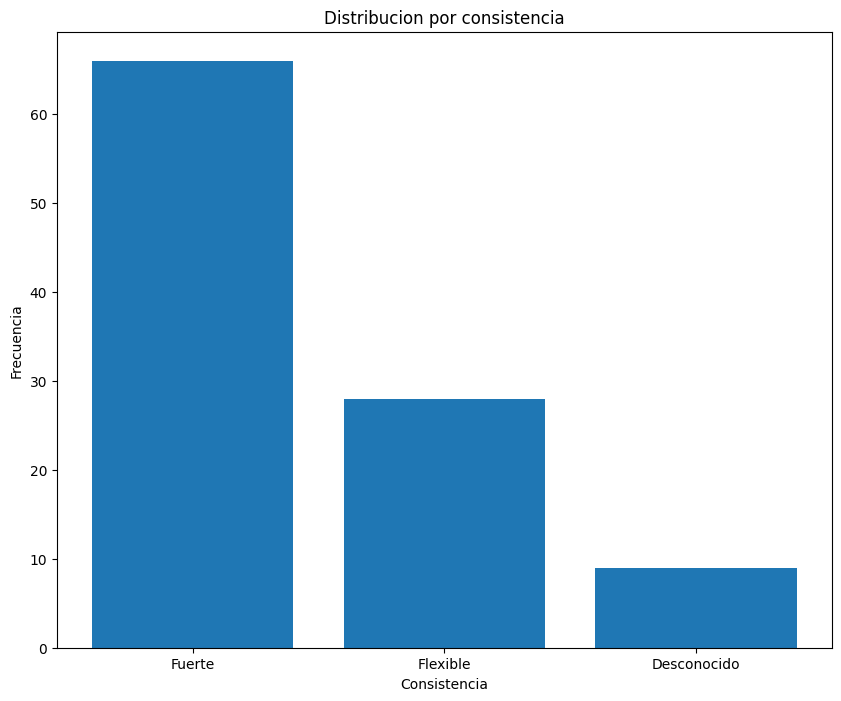

In [ ]:
#Grafico Consistencia
plt.figure(figsize=(10, 8))
plt.bar(frecuencias_duro['Consistencia'], frecuencias_duro['Frecuencia'])
plt.xlabel('Consistencia')
plt.ylabel('Frecuencia')
plt.title('Distribucion por consistencia')
plt.show()

**Comision**

In [ ]:
#Frecuencias Comisiones
#También estamos ante una variable categórica. De ahí que primero creamos la tabla de frecuencias absolutas.
frecuencias_comision = df2['Comision'].value_counts().reset_index()
frecuencias_comision.columns = ['Comision', 'Frecuencia']
frecuencias_comision.info()
frecuencias_comision

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Comision    7 non-null      category
 1   Frecuencia  7 non-null      int64   
dtypes: category(1), int64(1)
memory usage: 547.0 bytes


,Comision,Frecuencia
0,Primera,23
1,Cuarta,15
2,Séptima,15
3,Tercera,15
4,Quinta,14
5,Segunda,11
6,Sexta,10


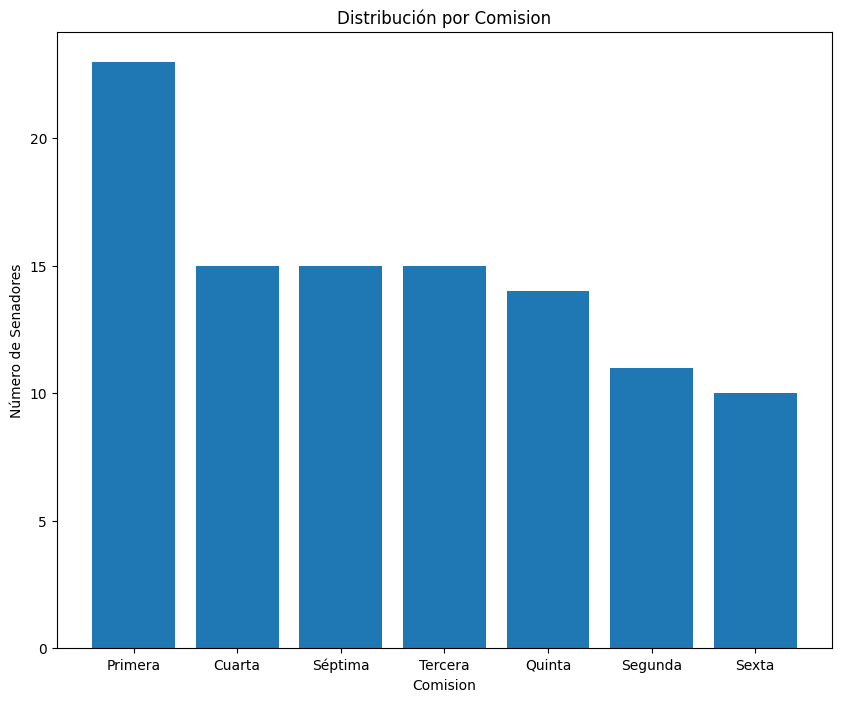

In [ ]:
#Grafico Comisiones
plt.figure(figsize=(10, 8))
plt.bar(frecuencias_comision['Comision'], frecuencias_comision['Frecuencia'])
plt.xlabel('Comision')
plt.ylabel('Número de Senadores')
plt.title('Distribución por Comision')
plt.show()

**Departamento**

In [ ]:
#Frecuencias Departamentos
frecuencias_departamento= df2['Departamento'].value_counts().reset_index()
frecuencias_departamento.columns = ['Departamento', 'Frecuencia']
frecuencias_departamento.info()
frecuencias_departamento

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Departamento  28 non-null     category
 1   Frecuencia    28 non-null     int64   
dtypes: category(1), int64(1)
memory usage: 1.6 KB


,Departamento,Frecuencia
0,Desconocido,16
1,Antioquia,12
2,Bogotá,7
3,Atlántico,7
4,Córdoba,6
5,Santander,6
6,Bolivar,6
7,Valle Del Cauca,6
8,Norte De Santander,4
9,Cesar,3


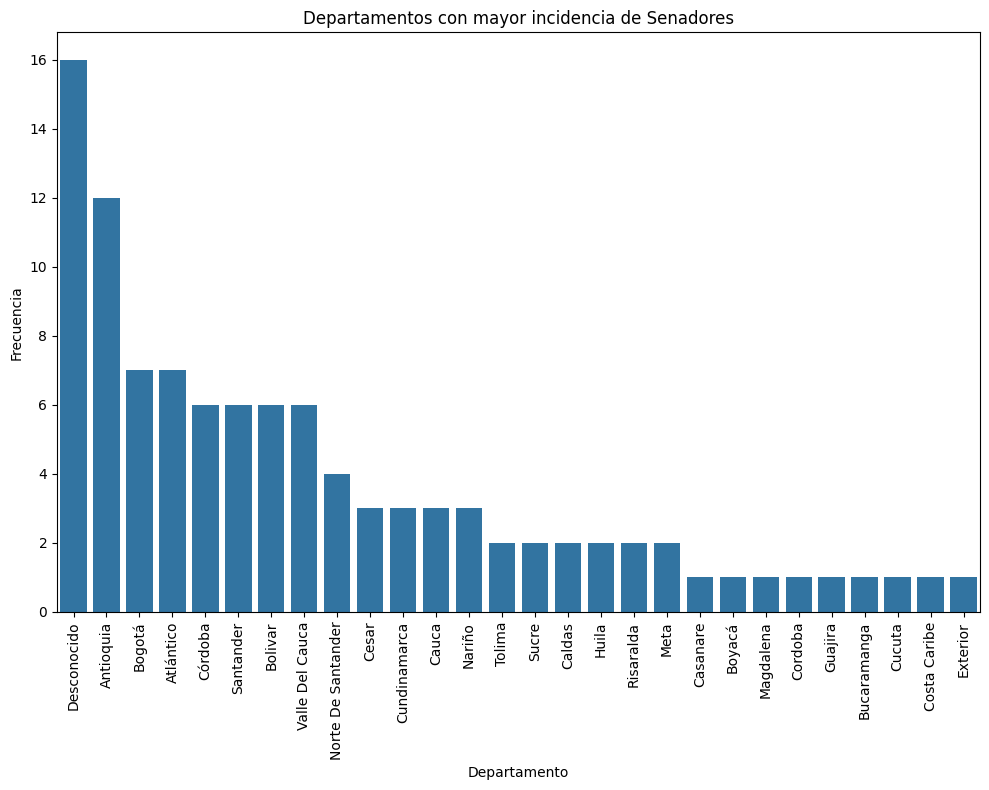

In [ ]:
#Grafico Departamento
plt.figure(figsize=(10, 8))
sns.barplot(x='Departamento', y='Frecuencia', data=frecuencias_departamento,
            order=frecuencias_departamento["Departamento"])
plt.title('Departamentos con mayor incidencia de Senadores')
plt.xlabel('Departamento')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)  # Roto las etiquetas del eje X

plt.tight_layout()
plt.show()


**Vamos a explorar posibles correlaciones entre las variables**